# Reading Activity 11: Selecting prior information


## Objectives

+ Develop systematic ways for assigning probabilities.

## References

+ [Principle of maximum entropy](https://en.wikipedia.org/wiki/Principle_of_maximum_entropy) wikipedia entrty.

## How do we come up with the right probability assignments?

In applications we often found ourselves in a situation where we have to pick prior probabilities of a given variable. That is, pick probabilities before we see any specific data from that variable.
An important question is how we come up with these prior probabilities.
Is there a systematic theoretical framework we could follow?
There are basically three widely accepted ways:

+ The principle of insufficient reason.
+ The principle of maximum entropy.
+ The principle of transformation groups.

In this lecture, we will explain the first two and just touch upon the third one.
At the beginning, what we talk about will just work with discrete random variables.
Continuous random variables are a little bit trickier and we are going to discuss them at the end.

## Principle of Insufficient Reason

The principle of insufficient reason has its origins to Laplace. The original statement was:
> The theory of chance consists in reducing all the events of the same kind to a certain number of cases equally possible, that is to say, to such as we may be equally undecided about in regard to their existence, and in determining the number of cases favorable to the event whose probability is sought. The ratio of this number to that of all the cases possible is the measure of this probability, which is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible.
*Pierre-Simon Laplace*

Let's restate this in simpler terms.
Assume that the random variable $X$ can take $N$ possible values, $1, 2,\dots,N$.
If this is all we know about this random variable then *the principle of insufficient reason* tells us to set:
$$
p(x) = \frac{1}{N},
$$
for $x$ in $\{1,2,\dots,N\}$.
That is, the principle of insufficient reason tells us to assign the same probability to each possibility.
Intuitively, any other choice we could make would introduce a bias towards one value or another.

### Example: Throwing a six-sided die
Consider a six-sided die with sides numbered $1$ to $6$.
Call $X$ the random variable corresponding to an experiment of throwing the die.
What is the probability of the die taking a specific value.
Using the principle of insufficient reason, we set:
$$
p(X=x) = \frac{1}{6}.
$$

## The Principle of Maximum Entropy

The principle of maximum entropy extends the principe of insufficient reason in a very useful way.
It tells you what probability distribution to assign to a random variable $X$ when you have some prior information about it.
This information could include, for example, the expected value of $X$, or maybe its variance (see the section on *testable prior information* for a more precise description of what is allowed).
The simplest non-mathematical definition of the principle of maximum entropy I could find is due to E. T. Jaynes:

> The knowledge of average values does give a reason for preferring some possibilities to others, but we would like [...] to assign a probability distribution which is as uniform as it can be while agreeing with the available information."

Why does he say "as uniform as it can be?" 
He does this because he wants the principle to be consistent with the principle of insufficient reason when there is not available information.
Of course, the uniform distribution is the most "uncertain" distribution, so we could also say that we are looking for a maximumally uncertain distribution which agrees with the available information.
The "uncertainty" of a probability distribution is measured by its "information entropy", a concept that we explain in the subsequent section.

### Information entropy
We would like to know, how much uncertainty there is in a probability mass function $p(x)$.
In 1948, [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) posed and answered this problem in his seminal paper titled "A Mathematical Theory of Communication."
The details of his derivation are beyond the scope of this course, but they can be summarized as follows:

+ He looked for a functional $\mathbb{H}[p(X)]$ that measured the uncertainty of the probability mass function $p(x)$ using real values.
+ He wrote down some axioms that this functional should satisfy. For example, that is should be continuous, and that it should have its maximum when $p(x)$ is the uniform (because the uniform distribution has the maximum uncertainty).
+ He did a little bit of math, and provied that (up to an arbitrary multiplicative constant) the function he was looking for must have this form:
$$
\mathbb{H}[p(X)] = -\sum_x \log p(x) p(x).
$$
+ As he was looking for a name for this function, he showed his discovery to [von Neumann](https://en.wikipedia.org/wiki/John_von_Neumann) who recognized the similarity to the entropy of statistical mechanics first introduced by [J. W. Gibbs](https://en.wikipedia.org/wiki/Josiah_Willard_Gibbs).

### Example: Information entropy of a distribution with two outcomes
Let's take a random variable $X$ with just two possible values, say $0$ and $1$.
It probability mass function can be described by two numbers:
$$
p_0 = p(X=0),
$$
and
$$
p_1 = p(X=1) = 1 - p_0.
$$
So, the information entropy of this distribution is simply a function of $p_0$:
$$
\mathbb{H}[p(X)] = -\sum_x \log p(x) p(x) = -p_0 \log p_0 - p_1 \log p_1 = -p_0 \log p_0 + (1-p_0)\log (1-p_0).
$$
Let's plot it as we vary $p_0$:

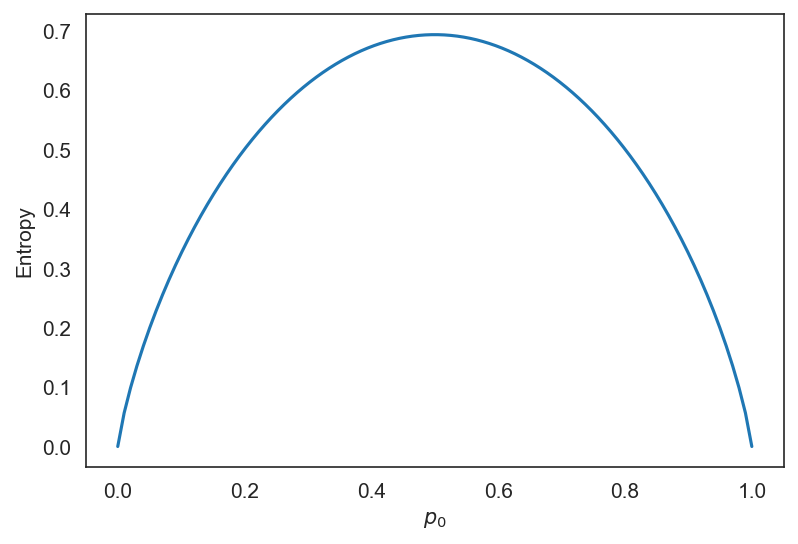

In [5]:
import numpy as np
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(dpi=150)
eps = 1e-8
p = np.linspace(eps, 1. - eps, 100)
H = -p * np.log(p) - (1. - p) * np.log(1. - p)
ax.plot(p, H)
ax.set_xlabel('$p_0$')
ax.set_ylabel('Entropy');

Notice that the function is maximized at $p_0 = 0.5$ because this corresponds to maximum uncertainty.
The function is minimized (as a matter of fact it is exactly zero) at $p_0 = 0$ and $p_0 = 1$ because both these cases correspond to minimum uncertainty (you are certain what is going to happen).

### Mathematical description of testable information
For our purposes, it suffices to assume that our information about $X$ comes in the form of expectations of functions of $X$, i.e., it is:
$$
\mathbb{E}[f_k(X)] = F_k,
$$
for some *known functions* $f_k(x)$ and some *known values* $F_k$ for their expectations, $k=1,\dots,K$.
Let's demonstrate that this definition includes some important cases:

+ $I = $ "The expected value of $X$ is $\mu$." This is obviously included as it is just the statement 
$$
\mathbb{E}[X] = \mu
$$. So, we are covered by setting $K=1$, $f_1(x) = x$, and $F_1 = \mu$.

+ $I = $ "The expected value of $X$ is $\mu$ and the variance of $X$ is $\sigma^2$." Here we obviously have $\mathbb{E}[X] = \mu$, just like before. The second condition is about the variance, $\mathbb{V}[X] = \sigma^2$. We can easily turn this into an expectation by using the formula $\mathbb{V}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2)$. It becomes:
$$
\mathbb{E}[X^2] = \sigma^2 + \mu^2.
$$
So, we are covered again with $K=2$, $f_1(x) = x$, $f_2(x) = x^2$, $F_1 = \mu$, $F_2 = \sigma^2 + \mu^2$.

### Mathematical statement of the principle of maximum entropy
Having defined the measure of uncertainty and how the available information is modeled, we can now state the principle of maximum entropy mathematically.
Take a random variable with $N$ different possibilities with probabilities $p_1=p(X=x_1),\dots,p_N = p(X=x_N)$ to be identified.
We need to maximize:
$$
\mathbb{H}[p(X)] = -\sum_{i=1}^N p_i\log p_i,
$$
subject to the normalization constraint:
$$
\sum_i p_i = 1,
$$
and the testable information constraints:
$$
\mathbb{E}[f_k(X)] = F_k.
$$
The general solution of this problem can be found using the [Karush-Kuhn-Tucker conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions).
If you go through the derivation, you will find that:
$$
p(X=x_i) = \frac{1}{Z}\exp\left\{\sum_{k=1}^K\lambda_kf_k(x_i)\right\},
$$
where the $\lambda_k$'s are constants and $Z$ is the normalization constant:
$$
Z = \sum_i \exp\left\{\sum_{k=1}^K\lambda_kf_k(x_i)\right\}.
$$
The $\lambda_k$'s can be identified by solving the system of non-linear equations:
$$
F_k = \frac{\partial Z}{\partial \lambda_k},
$$
for $k=1,\dots,K$.

### Examples of discrete maximum entropy distributions

In what follows, we provide some examples of maximum entropy distributions that naturally arise.

+ The categorical with equal probabilities $\operatorname{Categorical}(\frac{1}{N},\dots,\frac{1}{N})$ is the maximum entropy distribution for a random variable $X$ taking $N$ different values (no other constraints).

+ The Bernoulli distribution $\operatorname{Bernoulli}(\theta)$ is the maximum entropy distribution for a random variable $X$ taking two values $0$ and $1$ with known expectation $\mathbb{E}[X] = \theta$.

+ The Binomial distribution $B(\theta,n)$ is the maximum entropy distribution for a random variable $X$ taking values $0, 1,\dots,n$ with known expectation $\mathbb{E}[X] = \theta n$ (within the class of $n$-generalized binomial distributions, i.e., the distribution representing the number of successful trials in $n$, potentially correlated, experiments).

+ The Poisson distribution $\operatorname{Poisson}(\lambda)$ is the maximum entropy distribution for a random variable $X$ taking values $0, 1, 2,\dots$ with known expectation $\mathbb{E}[X] = \lambda$ (within the class of $\infty$-generalized binomial distributions).

+ The [canonical ensemble](https://en.wikipedia.org/wiki/Canonical_ensemble) is the maximum entropy distribution over the states of a quantum mechanical system with known expected energy.

+ The [grand canonical ensemble](https://en.wikipedia.org/wiki/Grand_canonical_ensemble) is the maximum entropy distribution over the states of a quanum mechanical system consiting of many different numbers of particles with known expected number of particles per type and known expected energy.

### Continuous distributions
Shannon's entropy only works for discrete distributions.
Why?
Consider the naïve generalization:
$$
\mathbb{H}_{\text{naïve}}[p(X)] = -\int p(x)\log p(x)dx.
$$
Now, imagine that you could equally well work with a transformed version of $X$.
Mathematically, assume that $Y = T(X)$ where $T(x)$ is invertible.
Since $X$ and $Y$ are connected in this way you should be getting the same information entropy independently of whether you calculate it with $p(X)$ or $p(Y)$.
But, there are many counter examples where you get:
$$
\mathbb{H}_{\text{naïve}}[p(X)] \not= \mathbb{H}_{\text{naïve}}[p(Y)].
$$
This shows that $\mathbb{H}_{\text{naïve"}}[p(X)]$ is a bad definition of uncertainty for continuous distributions.

For continuous distributions, the correct thing to use is the relative entropy:
$$
\mathbb{H}[p(X)] = -\int p(x)\log\frac{p(x)}{q(x)}dx,
$$
where $q(x)$ is a prior density function (not necessarily normalized) encoding maximum uncertainty.
You can find more about $q(x)$ in the note below.
With this definition the maximum entropy principle for continuous random variables is as follows.
Maximize:
$$
\mathbb{H}[p(X)] = -\int p(x)\log\frac{p(x)}{q(x)}dx,
$$
subject to the normalization constraint:
$$
\int p(x) dx = 1,
$$
and the testable information constraints:
$$
\mathbb{E}[f_k(X)] = F_k.
$$
Applying the [Karush-Kuhn-Tucker conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions), we find that:
$$
p(x) = \frac{q(x)}{Z}\exp\left\{\sum_{k=1}^K\lambda_kf_k(x)\right\},
$$
where the $\lambda_k$'s are constants and $Z$ is the normalization constant:
$$
Z = \int q(x)\exp\left\{\sum_{k=1}^K\lambda_kf_k(x)\right\}dx.
$$
The $\lambda_k$'s can be identified by solving the system of non-linear equations:
$$
F_k = \frac{\partial Z}{\partial \lambda_k},
$$
for $k=1,\dots,K$.

### A note on $q(x)$
There are, of course, cases in which $q(x)$ is just the uniform density.
In these cases the mathematical form of the information entropy becomes identical to the discrete case.
For example, if $x$ is a location parameter, e.g., the 3D location of a particle free to move in a box, then $q(x)$ is indeed uniform.
As another example, imagine a particle constrained to move on a cyclic guide.
Then $q(x)$ is constant on the cyclic guide and zero everywhere else.
The takehome message dual. First, $q(x)$ depends on what the underlying random variable actually is.
Second, the identification of $q(x)$ is beyond the scope of the maximum entropy principle.
In other words, you need to have $q(x)$ before applying the maximum entropy principle.
There are some systematic methods for identifying maximum uncertainty densities such as the [principle of transformation groups](https://en.wikipedia.org/wiki/Principle_of_transformation_groups) and the theory of [Haar measures](https://en.wikipedia.org/wiki/Haar_measure) but both these concepts require advanced mathematics.
In many practical examples common sense is sufficient for coming up with $q(x)$.


### Examples of continuous maximum entropy distributions

In what follows, we provide some examples of maximum entropy distributions that naturally arise.

+ The Uniform distribution $U([a,b])$ is the maximum entropy distribution for a random variable $X$ taking values in $[a,b]$ with $q(x) = 1$ and no other constraints.

+ The normal distribution $N(\mu,\sigma^2)$ is the maximum entropy distribution for a random variable $X$ taking values in $\mathbb{R}$ with $q(x) = 1$, known expectation $\mathbb{E}[X] = \mu$ and variance $\mathbb{V}[X] = \sigma^2$.

+ The multivariate normal distribution $N(\boldsymbol{\mu},\boldsymbol{\Sigma})$ is the maximum entropy distribution for a random vector $\mathbf{X}$ taking values in $\mathbb{R}^d$ with $q(\mathbf{x}) = 1$ and known expectation $\mathbb{E}[\mathbf{X}] = \boldsymbol{\mu}$ and covariance matrix $\mathbb{C}[X,X] = \boldsymbol{\Sigma}$.

+ The Exponential distribution $\operatorname{Exp}(\lambda)$ is the maximum entropy distribution for a random variable $X$ taking values in $[0,\infty)$ with $q(x) = 1$ and known expectation $\mathbb{E}[X] = \frac{1}{\lambda}$.

For an almost list of a commonly used maximum entropy distributions, see the [Maximum entropy probability distribution entry of wikipedia](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution).